<a href="https://colab.research.google.com/github/khoir-roni/prediction_project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === Step 1: Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# === Step 2: Load & Clean Data ===

import pandas as pd
import numpy as np

# Gantilah dengan path file kamu setelah upload ke Colab
file_path = '/content/drive/MyDrive/db/coba parameter.csv' # <- sesuaikan nama file

# Langkah 1: Baca file dengan delimiter ';' tanpa decimal
df_raw = pd.read_csv(file_path, delimiter=';')

# Langkah 2: Fungsi untuk membersihkan angka (ganti koma jadi titik, hapus spasi, dll)
def clean_number(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace(' ', '').replace(',', '.').replace('−', '-')
    try:
        return float(x)
    except:
        return np.nan

# Langkah 3: Simpan nama kolom dan bersihkan data
columns = df_raw.columns.tolist()
df_clean = df_raw.copy()

# Ubah kolom TANGGAL ke format datetime
df_clean['TANGGAL'] = pd.to_datetime(df_clean['TANGGAL'], errors='coerce', dayfirst=True)

# Ubah semua kolom selain TANGGAL menjadi float
for col in columns:
    if col != 'TANGGAL':
        df_clean[col] = df_clean[col].apply(clean_number)

# Buang baris yang tidak memiliki tanggal valid
df_clean = df_clean.dropna(subset=['TANGGAL'])

# Optional: reset index
df_clean.reset_index(drop=True, inplace=True)

# Tampilkan ringkasan data
print(df_clean.info())
print(df_clean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7987 entries, 0 to 7986
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TANGGAL   7987 non-null   datetime64[ns]
 1   MW_3      7986 non-null   float64       
 2   PF_3      7987 non-null   float64       
 3   AMP_3     7986 non-null   float64       
 4   VOLT_3    7986 non-null   float64       
 5   MVAR_3    7986 non-null   float64       
 6   FREQ_3    7986 non-null   float64       
 7   W_GEN3A   7986 non-null   float64       
 8   W_GEN3B   7986 non-null   float64       
 9   W_GEN3C   7986 non-null   float64       
 10  TC3_IN1   7986 non-null   float64       
 11  TC3_OUT2  7986 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 748.9 KB
None
              TANGGAL  MW_3  PF_3  AMP_3  VOLT_3  MVAR_3  FREQ_3  W_GEN3A  \
0 2025-01-01 00:30:00  0.01   0.0  -0.00   -0.01   -0.01   13.31     38.0   
1 2025-01-01 01:00:00  0.01 

In [3]:
import re

# Fungsi pembersih angka
def clean_number(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    x = re.sub(r'[^\d,.\-]', '', x)  # Hapus simbol asing selain angka, titik, koma, minus
    x = x.replace(',', '.')
    try:
        return float(x)
    except:
        return np.nan

# Terapkan pada semua kolom kecuali TANGGAL
for col in columns:
    if col != 'TANGGAL':
        df_clean[col] = df_clean[col].apply(clean_number)


In [4]:
print("Kolom dengan semua nilai NaN:")
print(df_clean.columns[df_clean.isna().all()].tolist())


Kolom dengan semua nilai NaN:
[]


Kolom non-numeric atau NaN seluruhnya:
['PF_3']


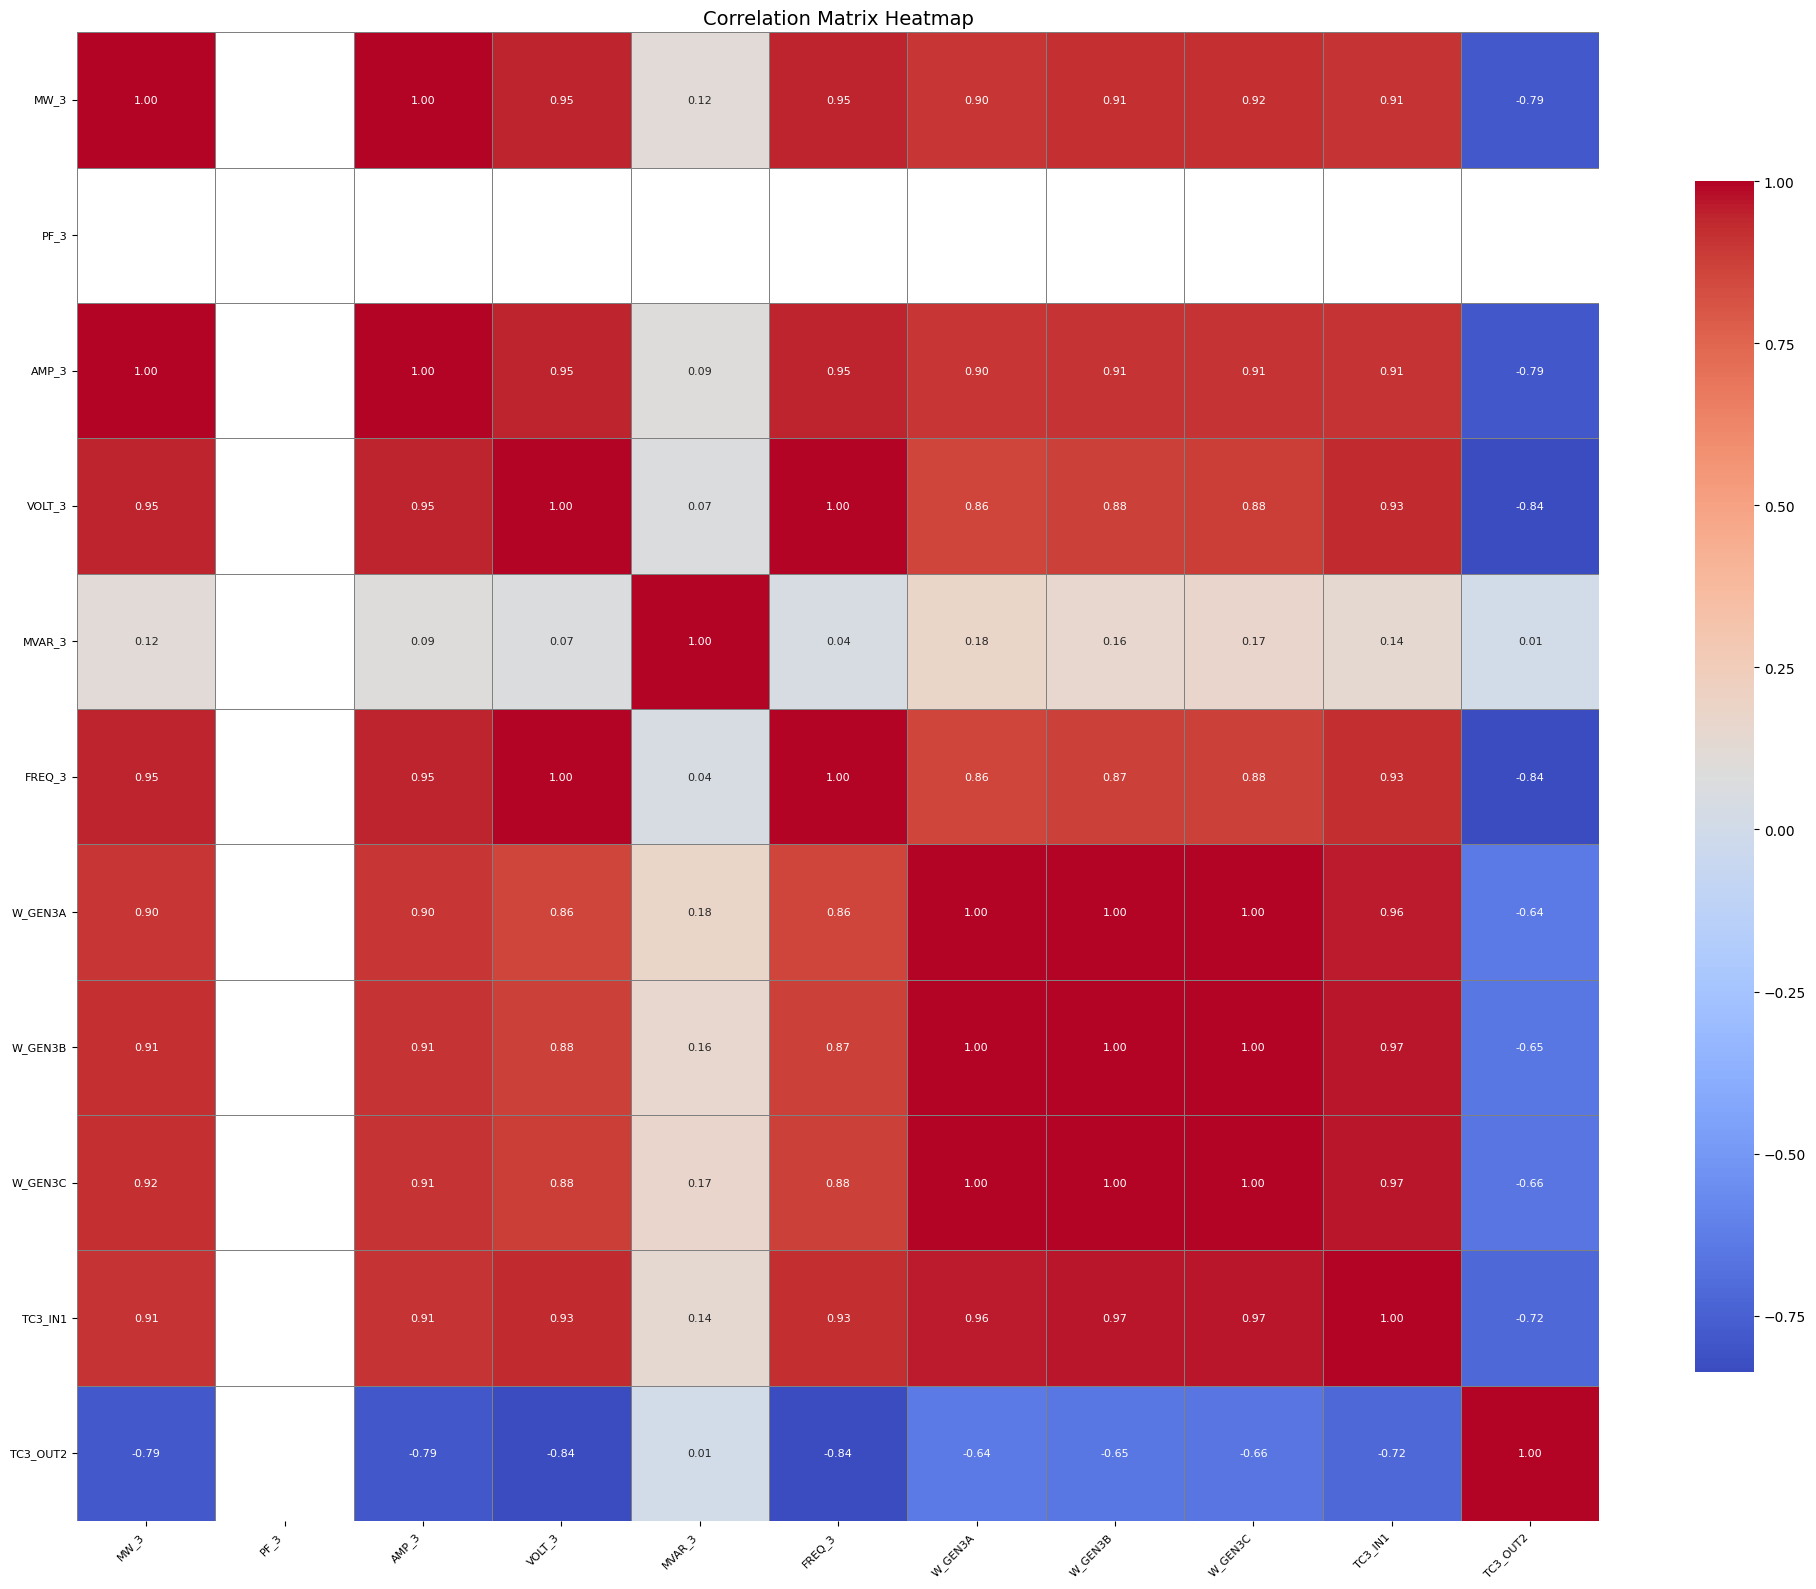

In [5]:
# === Step 4: Korelasi Matriks dan Heatmap ===

plt.figure(figsize=(20, 16))  # Ukuran diperbesar agar label muat semua
corr = df_clean.drop(columns='TANGGAL').corr()

# Cek apakah ada kolom kosong agar tahu kenapa tidak muncul
print("Kolom non-numeric atau NaN seluruhnya:")
print(corr.columns[corr.isnull().all()].tolist())

sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            annot_kws={"size": 8},
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.tight_layout()
plt.show()


In [6]:
# Hapus kolom dengan hanya 1 nilai unik (misalnya semua 0)
cols_to_drop = [col for col in df_clean.columns if col != 'TANGGAL' and df_clean[col].nunique() <= 1]

print(f"Menghapus kolom yang tidak informatif: {cols_to_drop}")
df_clean.drop(columns=cols_to_drop, inplace=True)


Menghapus kolom yang tidak informatif: ['PF_3']


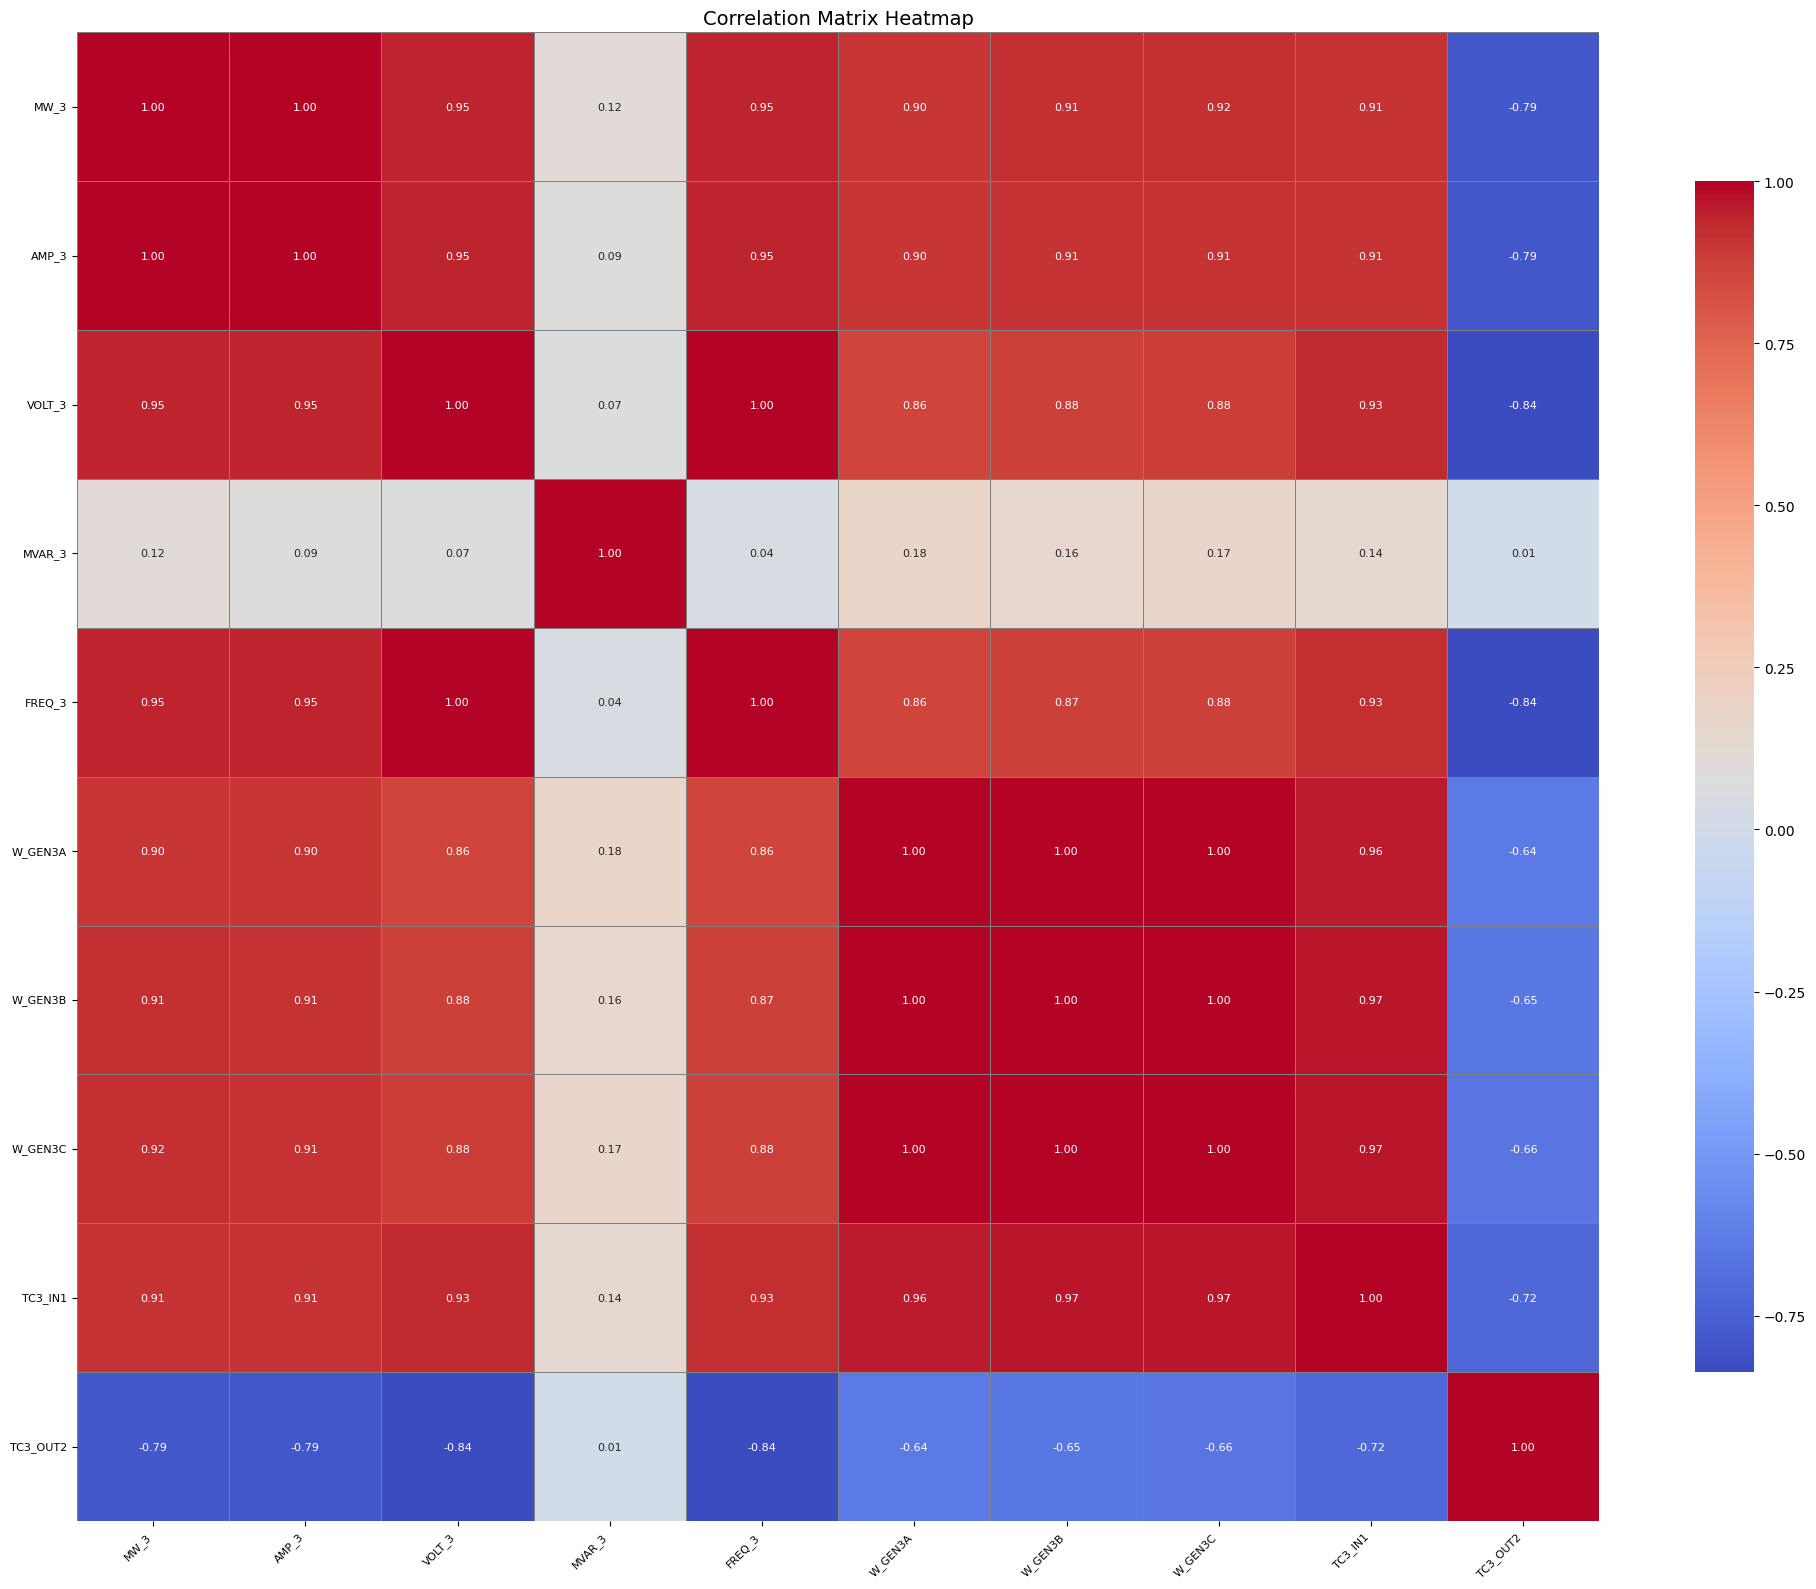

In [7]:
plt.figure(figsize=(20, 16))
corr = df_clean.drop(columns='TANGGAL').corr()

sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            annot_kws={"size": 8},
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={"shrink": 0.8})

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.tight_layout()
plt.show()


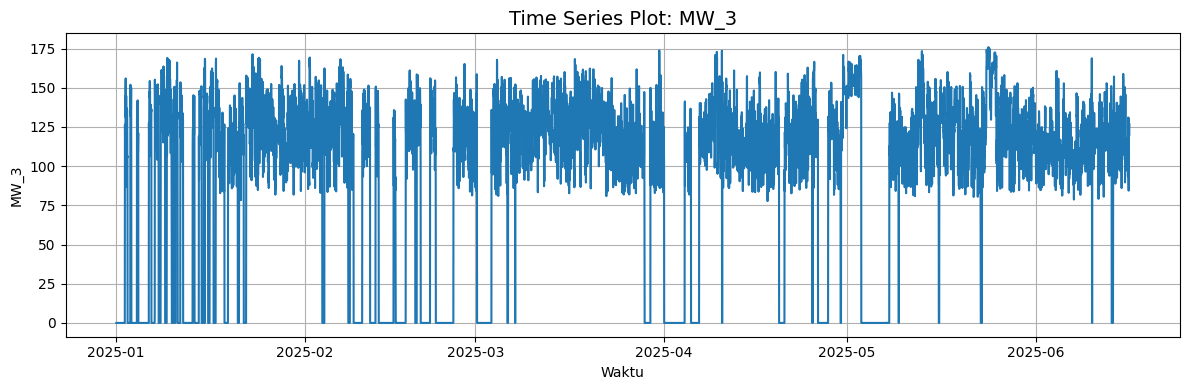

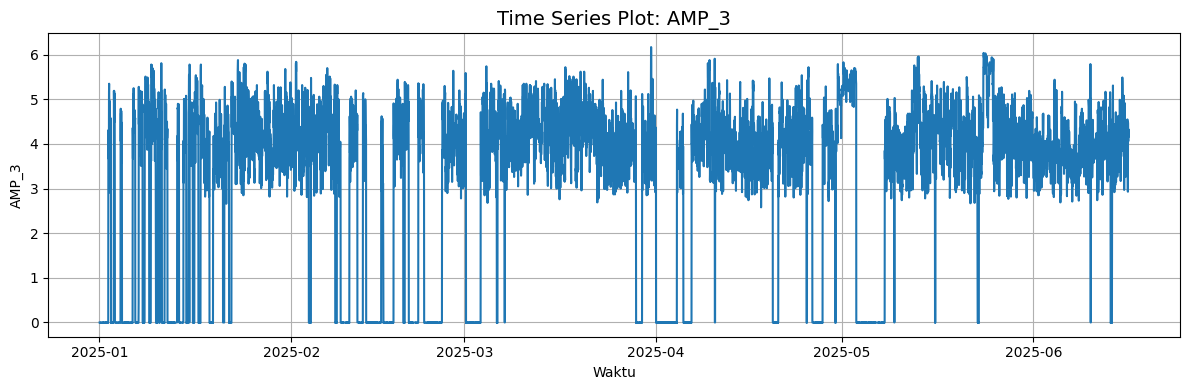

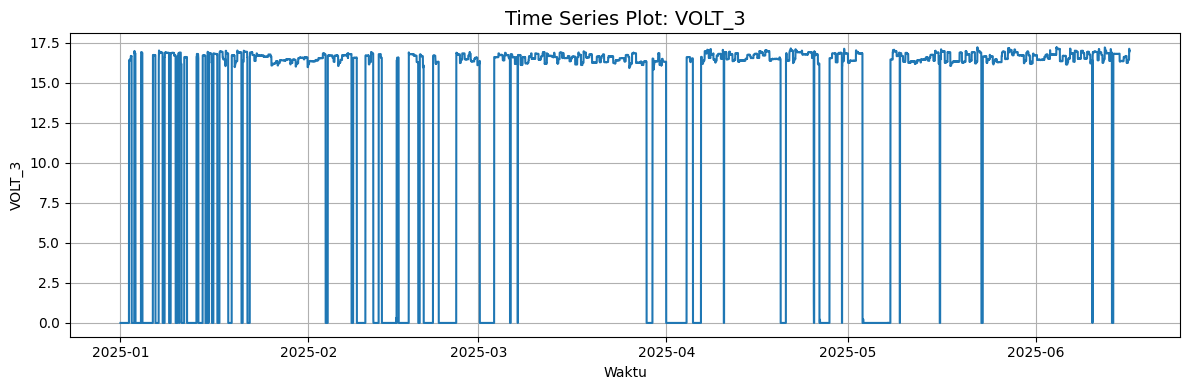

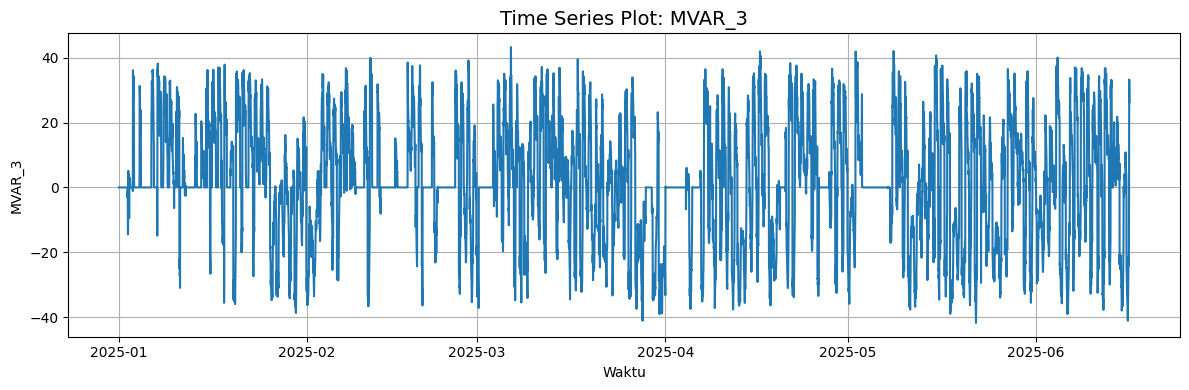

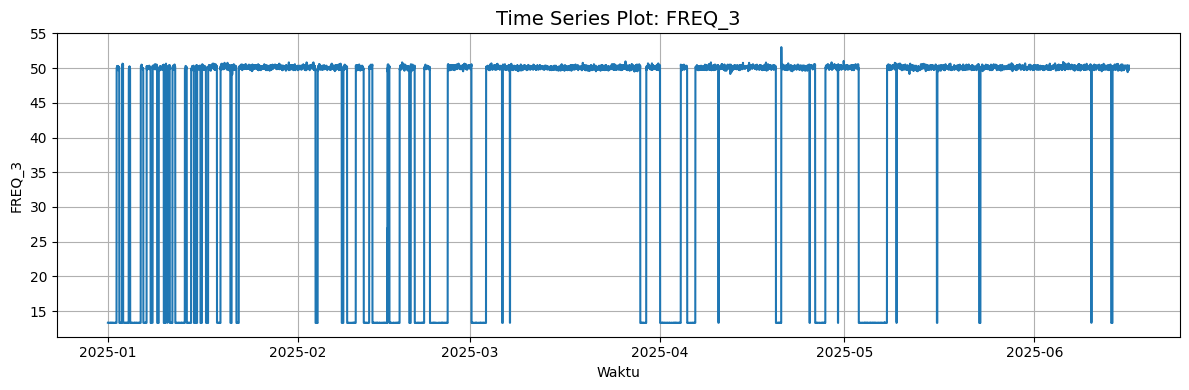

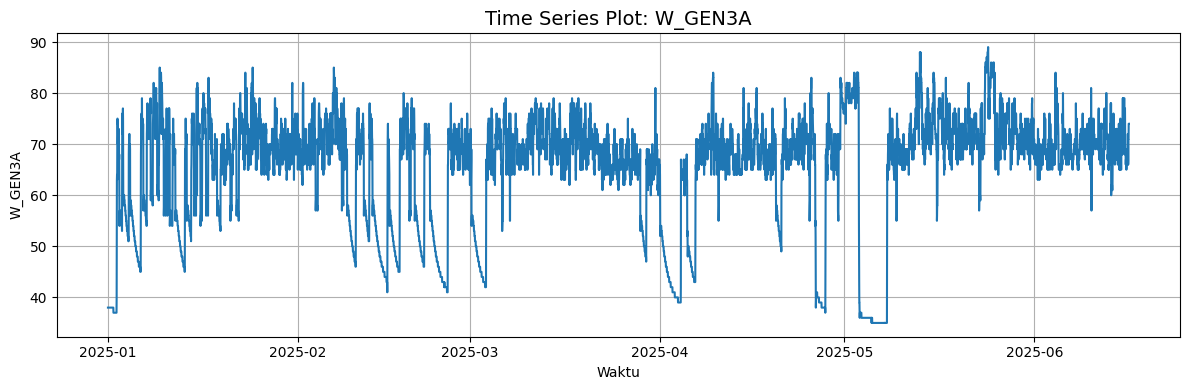

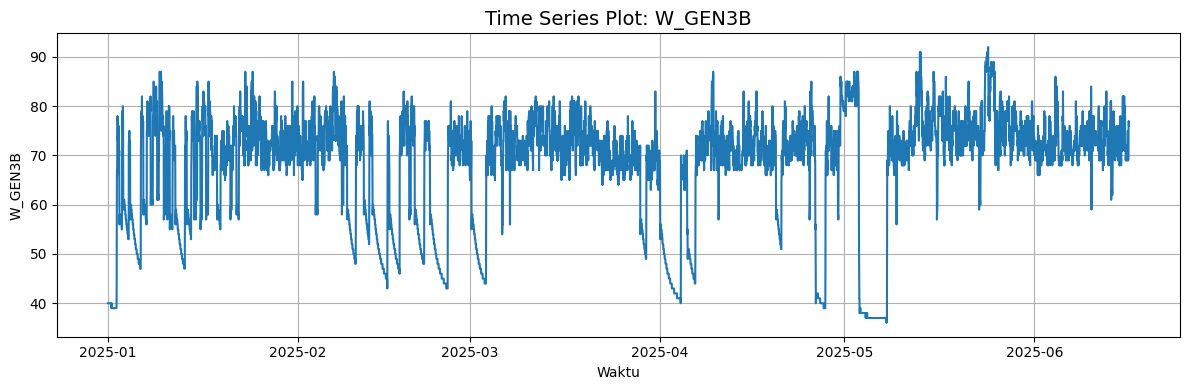

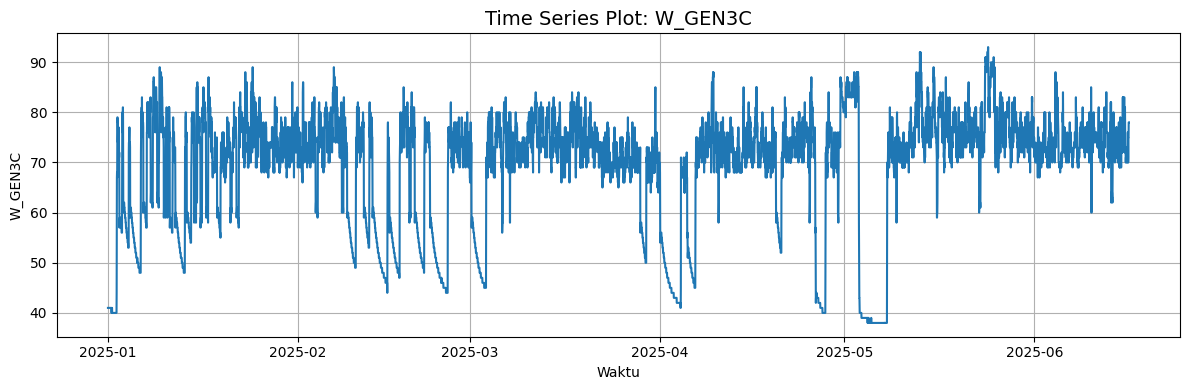

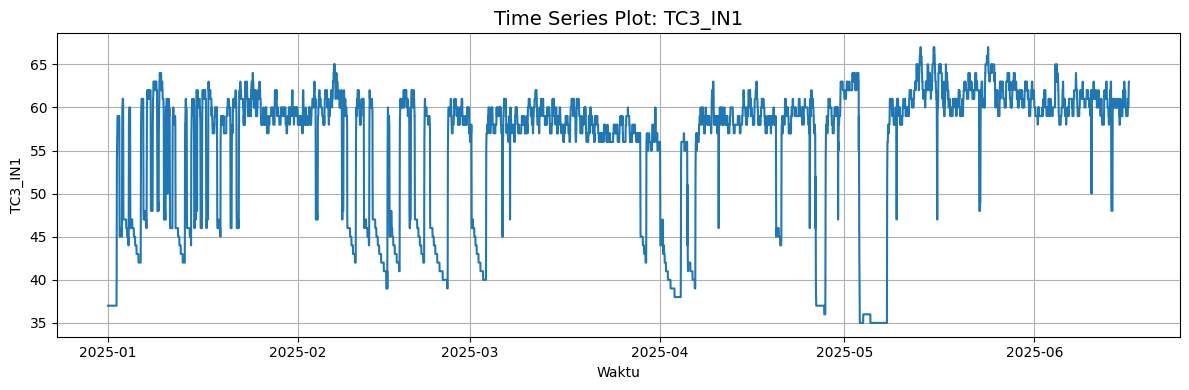

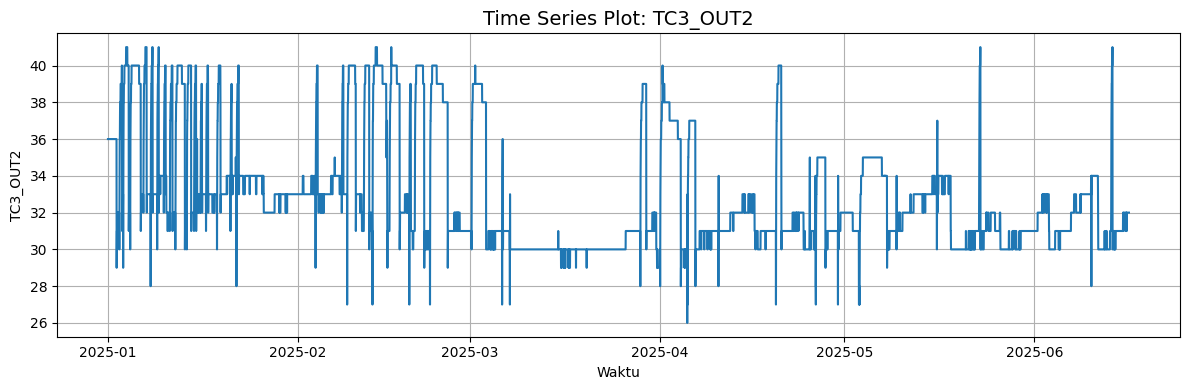

In [8]:
import matplotlib.pyplot as plt

# Buat visualisasi semua kolom selain 'TANGGAL'
for col in df_clean.columns:
    if col != 'TANGGAL':
        plt.figure(figsize=(12, 4))
        plt.plot(df_clean['TANGGAL'], df_clean[col], label=col, color='tab:blue')
        plt.title(f'Time Series Plot: {col}', fontsize=14)
        plt.xlabel('Waktu')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Tentukan fitur dan target
features = ['MW_3', 'AMP_3', 'VOLT_3', 'MVAR_3', 'FREQ_3', 'TC3_IN1', 'TC3_OUT2']
targets = ['W_GEN3A', 'W_GEN3B', 'W_GEN3C']

# Gabungkan fitur dan target untuk scaling
all_columns = features + targets

# Drop baris yang masih mengandung NaN
df_lstm = df_clean[all_columns].dropna().copy()

# Normalisasi data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

# Buat dataframe baru hasil scaling
scaled_df = pd.DataFrame(scaled_data, columns=all_columns)

# Fungsi untuk membuat dataset time-series (X, y)
def create_lstm_dataset(data, target_col, window_size=24):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size][features].values)
        y.append(data.iloc[i+window_size][target_col])
    return np.array(X), np.array(y)

# Buat dataset untuk masing-masing target
lstm_datasets = {}
for target in targets:
    X, y = create_lstm_dataset(scaled_df, target, window_size=24)
    lstm_datasets[target] = (X, y)

# Tampilkan bentuk dataset untuk setiap target
{target: {'X': X.shape, 'y': y.shape} for target, (X, y) in lstm_datasets.items()}


{'W_GEN3A': {'X': (7962, 24, 7), 'y': (7962,)},
 'W_GEN3B': {'X': (7962, 24, 7), 'y': (7962,)},
 'W_GEN3C': {'X': (7962, 24, 7), 'y': (7962,)}}

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split

# Ambil dataset untuk target W_GEN3A
X, y = lstm_datasets['W_GEN3A']

# Split train-test
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define custom RMSE and R² metrics
def rmse_metric(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

def r2_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - ss_res / (ss_tot + K.epsilon()))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[MeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError(), rmse_metric, r2_metric])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('LSTM_W_GEN3A.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(trainX, trainY,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint, reduce_lr],
                    verbose=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
159/160 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0563 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 35.4656 - mean_squared_error: 0.0563 - r2_metric: -101.6475 - rmse_metric: 0.3007
Epoch 1: val_loss improved from inf to 0.01086, saving model to LSTM_W_GEN3A.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 0.0559 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 35.3488 - mean_squared_error: 0.0559 - r2_metric: -101.2562 - rmse_metric: 0.3002 - val_loss: 0.0109 - val_mean_absolute_error: 0.0788 - val_mean_absolute_percentage_error: 12658763.0000 - val_mean_squared_error: 0.0109 - val_r2_metric: -18940438.0000 - val_rmse_metric: 0.1170 - learning_rate: 0.0010
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 18.6030 - mean_squared_error: 0.0121 - r2_metric: -61.8569 - rmse_metric: 0.2592
Epoch 2: val_loss improved from 0.01086 to 0.01036, saving model t

In [11]:
# --- Step 1: Import Library ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split

# --- Step 2: Custom Metrics ---
def rmse_metric(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

def r2_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - ss_res / (ss_tot + K.epsilon()))

# --- Step 3: Ambil dataset W_GEN3A dari hasil preprocessing ---
X, y = lstm_datasets['W_GEN3A']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- Step 4: Build Model ---
model = Sequential([
    LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[MeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError(), rmse_metric, r2_metric])

# --- Step 5: Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('LSTM_W_GEN3A.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# --- Step 6: Train Model ---
history = model.fit(trainX, trainY,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint, reduce_lr],
                    verbose=1)


Epoch 1/50
158/160 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0485 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 35.7496 - mean_squared_error: 0.0485 - r2_metric: -85.0541 - rmse_metric: 0.2901
Epoch 1: val_loss improved from inf to 0.01198, saving model to LSTM_W_GEN3A.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 35.5875 - mean_squared_error: 0.0481 - r2_metric: -84.7265 - rmse_metric: 0.2896 - val_loss: 0.0120 - val_mean_absolute_error: 0.0845 - val_mean_absolute_percentage_error: 12274133.0000 - val_mean_squared_error: 0.0120 - val_r2_metric: -17473886.0000 - val_rmse_metric: 0.1213 - learning_rate: 0.0010
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0109 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 17.4175 - mean_squared_error: 0.0109 - r2_metric: -62.7827 - rmse_metric: 0.2576
Epoch 2: val_loss improved from 0.01198 to 0.00980, saving model to 

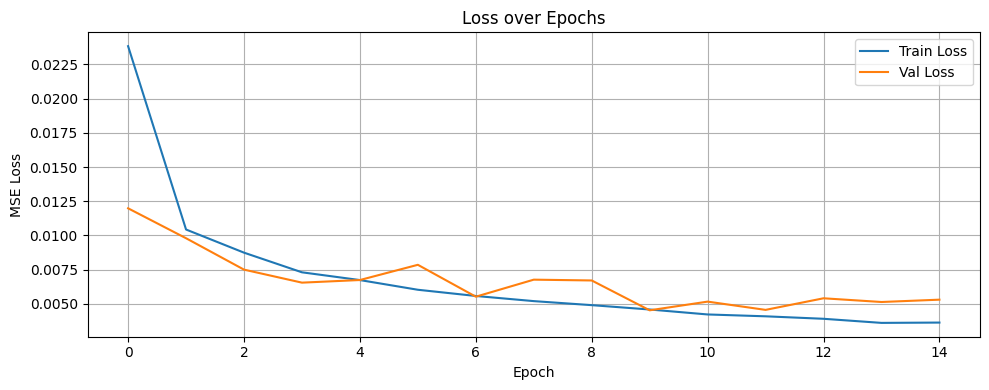

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Step 1: Visualisasi Training & Validation Loss ===
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [13]:
# Evaluasi performa di test set
test_pred = model.predict(testX).flatten()
test_true = testY.flatten()

mse = mean_squared_error(test_true, test_pred)
mae = mean_absolute_error(test_true, test_pred)
r2 = r2_score(test_true, test_pred)
rmse = np.sqrt(mse)

print(f"Test MSE  : {mse:.4f}")
print(f"Test RMSE : {rmse:.4f}")
print(f"Test MAE  : {mae:.4f}")
print(f"Test R²   : {r2:.4f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Test MSE  : 0.0027
Test RMSE : 0.0520
Test MAE  : 0.0388
Test R²   : 0.6674


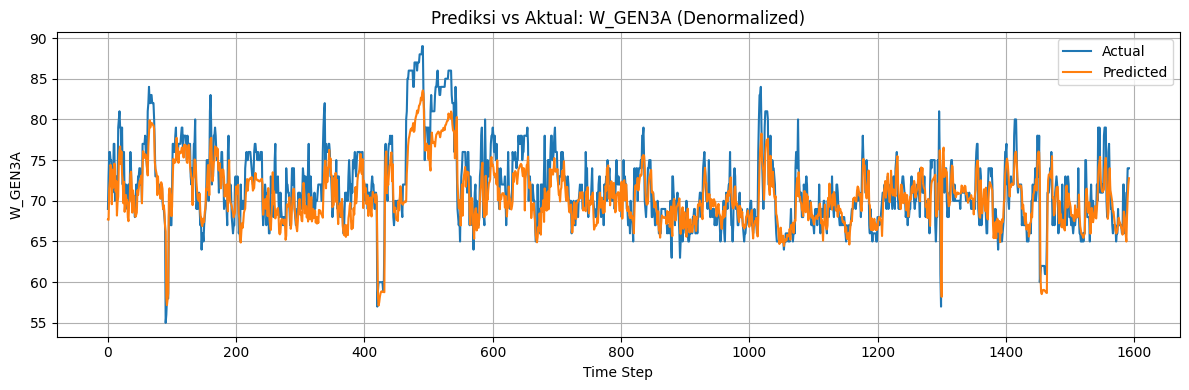

In [14]:
# Ambil kolom W_GEN3A sebelum scaling
original = df_clean[['W_GEN3A']].dropna().reset_index(drop=True)

# Hitung offset akibat window_size (24)
offset = 24 + int(len(trainY))  # agar test_pred align dengan data asli

# Denormalisasi prediksi dan actual
w_gen3a_min = scaler.data_min_[all_columns.index('W_GEN3A')]
w_gen3a_max = scaler.data_max_[all_columns.index('W_GEN3A')]

def denorm(value):
    return value * (w_gen3a_max - w_gen3a_min) + w_gen3a_min

test_pred_denorm = denorm(test_pred)
test_true_denorm = denorm(test_true)

# Plot prediksi vs aktual
plt.figure(figsize=(12, 4))
plt.plot(test_true_denorm, label='Actual')
plt.plot(test_pred_denorm, label='Predicted')
plt.title('Prediksi vs Aktual: W_GEN3A (Denormalized)')
plt.xlabel('Time Step')
plt.ylabel('W_GEN3A')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Tentukan fitur dan target
features = ['MW_3', 'AMP_3', 'VOLT_3', 'FREQ_3', 'TC3_IN1']
targets = ['W_GEN3A', 'W_GEN3B', 'W_GEN3C']

# Gabungkan fitur dan target untuk scaling
all_columns = features + targets

# Drop baris yang masih mengandung NaN
df_lstm = df_clean[all_columns].dropna().copy()

# Normalisasi data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

# Buat dataframe baru hasil scaling
scaled_df = pd.DataFrame(scaled_data, columns=all_columns)

# Fungsi untuk membuat dataset time-series (X, y)
def create_lstm_dataset(data, target_col, window_size=24):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size][features].values)
        y.append(data.iloc[i+window_size][target_col])
    return np.array(X), np.array(y)

# Buat dataset untuk masing-masing target
lstm_datasets = {}
for target in targets:
    X, y = create_lstm_dataset(scaled_df, target, window_size=24)
    lstm_datasets[target] = (X, y)

# Tampilkan bentuk dataset untuk setiap target
{target: {'X': X.shape, 'y': y.shape} for target, (X, y) in lstm_datasets.items()}



{'W_GEN3A': {'X': (7962, 24, 5), 'y': (7962,)},
 'W_GEN3B': {'X': (7962, 24, 5), 'y': (7962,)},
 'W_GEN3C': {'X': (7962, 24, 5), 'y': (7962,)}}

In [16]:
# Build model baru untuk W_GEN3B
model_b = Sequential([
    LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model_b.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[MeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError(), rmse_metric, r2_metric])

# Callbacks
early_stopping_b = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint_b = ModelCheckpoint('LSTM_W_GEN3B.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr_b = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train
history_b = model_b.fit(trainX, trainY,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping_b, checkpoint_b, reduce_lr_b],
                        verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


158/160 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0944 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 45.4870 - mean_squared_error: 0.0944 - r2_metric: -138.6151 - rmse_metric: 0.3410
Epoch 1: val_loss improved from inf to 0.01323, saving model to LSTM_W_GEN3B.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0934 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 45.2214 - mean_squared_error: 0.0934 - r2_metric: -137.5709 - rmse_metric: 0.3399 - val_loss: 0.0132 - val_mean_absolute_error: 0.0899 - val_mean_absolute_percentage_error: 13784707.0000 - val_mean_squared_error: 0.0132 - val_r2_metric: -22450804.0000 - val_rmse_metric: 0.1240 - learning_rate: 0.0010
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 20.8732 - mean_squared_error: 0.0144 - r2_metric: -62.9076 - rmse_metric: 0.2594
Epoch 2: val_loss improved from 0.01323 to 0.01123, saving model to LSTM_W_GE

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Step 1: Visualisasi Training & Validation Loss ===
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Evaluasi performa di test set
test_pred = model.predict(testX).flatten()
test_true = testY.flatten()

mse = mean_squared_error(test_true, test_pred)
mae = mean_absolute_error(test_true, test_pred)
r2 = r2_score(test_true, test_pred)
rmse = np.sqrt(mse)

print(f"Test MSE  : {mse:.4f}")
print(f"Test RMSE : {rmse:.4f}")
print(f"Test MAE  : {mae:.4f}")
print(f"Test R²   : {r2:.4f}")

In [17]:
model.save('best_lstm_model.h5')

In [18]:
model.save('my_model.keras.h5')